# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('./Profissao- Cientista de Dados_M10_support material.csv')

In [5]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [6]:
df.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

In [7]:
df1 = df[['posse_de_veiculo', 'posse_de_imovel', 'renda']]
df1

,posse_de_veiculo,posse_de_imovel,renda
0,False,True,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,True,False,7246.69
4,False,False,4017.37
...,...,...,...
14995,True,True,1193.29
14996,True,True,2519.18
14997,True,True,1586.85
14998,False,True,6975.39


In [8]:
df1.corr()

,posse_de_veiculo,posse_de_imovel,renda
posse_de_veiculo,1.000000,-0.014727,0.063414
posse_de_imovel,-0.014727,1.000000,0.029827
renda,0.063414,0.029827,1.000000


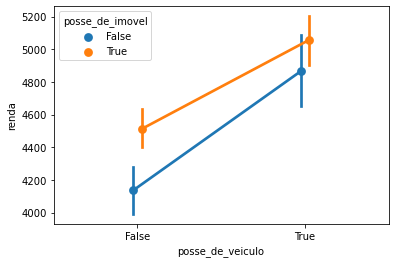

In [26]:
ax = sns.pointplot(x='posse_de_veiculo', y='renda', hue='posse_de_imovel', 
                   data = df1, dodge=True)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='renda'>

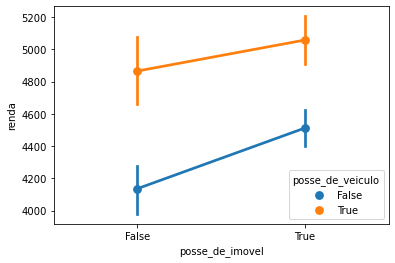

In [27]:
sns.pointplot(x='posse_de_imovel', y='renda', hue='posse_de_veiculo', data = df1)

In [11]:
df1_log = df1.copy()
df1_log['log_y'] = np.log(df1_log['renda'])
df1_log

,posse_de_veiculo,posse_de_imovel,renda,log_y
0,False,True,3369.24,8.122442
1,True,True,6096.14,8.715411
2,True,True,5658.98,8.640999
3,True,False,7246.69,8.888300
4,False,False,4017.37,8.298383
...,...,...,...,...
14995,True,True,1193.29,7.084469
14996,True,True,2519.18,7.831689
14997,True,True,1586.85,7.369506
14998,False,True,6975.39,8.850144


<AxesSubplot:xlabel='posse_de_veiculo', ylabel='log_y'>

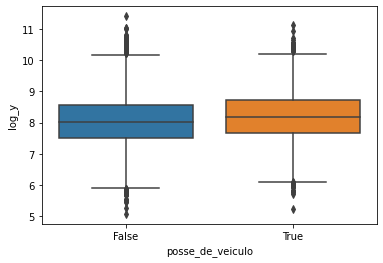

In [29]:
sns.boxplot(x='posse_de_veiculo', y='log_y', data = df1_log)

<AxesSubplot:xlabel='posse_de_imovel', ylabel='log_y'>

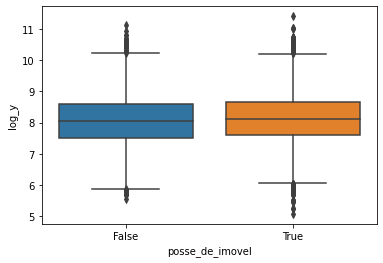

In [13]:
sns.boxplot(x='posse_de_imovel', y='log_y', data = df1_log)

In [14]:
df2 = df1[['posse_de_imovel', 'renda']]
imvl = df2.loc[df2['posse_de_imovel']==True]
imvl['renda'].mean()

4721.052703828587

In [15]:
no_imvl = df2.loc[df2['posse_de_imovel']==False]
no_imvl['renda'].mean()

4426.970481903189

In [16]:
yes_car = df1.loc[df1['posse_de_veiculo']==True]
yes_car['renda'].mean()

4992.579609120536

In [17]:
no_car = df1.loc[df1['posse_de_veiculo']==False]
no_car['renda'].mean()

4390.5069630195185

# Observações

Ambas variáveis qualitativas não são bons preditores de renda, pois os resultados não são significamente diferentes.
Não existem grandes diferenças ou preditores específicos que consigam nos mostrar quais variáveis são mais propensas para alterar a variável renda. 